# Analysis of hyperparameter search results

In the previous notebook we showed how to implement a randomized
search for tuning the hyperparameters of a `HistGradientBoostingClassifier`
to fit the `adult_census` dataset. In practice, a randomized hyperparameter
search is usually run with a large number of iterations.

In order to avoid the computational cost and still make a decent analysis,
we load the results obtained from a similar search with 500 iterations.

In [1]:
import pandas as pd

cv_results = pd.read_csv("../figures/randomized_search_results.csv", index_col=0)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__l2_regularization,param_classifier__learning_rate,param_classifier__max_bins,param_classifier__max_leaf_nodes,param_classifier__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.163128,0.069482,0.031028,0.002193,0.179453,2.754297,4,7,22,{'classifier__l2_regularization': 0.1794525712...,0.605568,0.683729,0.681136,0.601420,0.779143,0.670199,0.064929,450
1,1.788424,0.029883,0.050446,0.007586,1.318107,0.005646,13,47,37,{'classifier__l2_regularization': 1.3181071925...,0.773441,0.758941,0.758941,0.758941,0.763036,0.762660,0.005619,334
2,2.004220,0.064166,0.050646,0.006627,0.000016,0.045995,43,53,23,{'classifier__l2_regularization': 1.5922787275...,0.854784,0.859814,0.856948,0.854900,0.855583,0.856406,0.001870,56
3,0.171155,0.004386,0.029627,0.001357,0.000006,3.311405,158,42,10,{'classifier__l2_regularization': 6.1202979451...,0.665757,0.714715,0.722495,0.556784,0.779143,0.687779,0.074730,447
4,1.907732,0.362231,0.038635,0.007665,0.128974,0.143678,2,127,67,{'classifier__l2_regularization': 0.1289739514...,0.805923,0.800300,0.800164,0.799618,0.801392,0.801479,0.002295,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.161150,0.021681,0.029024,0.001382,6.734707,6.254450,34,5,91,{'classifier__l2_regularization': 6.7347067826...,0.507848,0.510238,0.519793,0.511739,0.516517,0.513227,0.004336,462
496,0.560468,0.030584,0.055434,0.017653,0.000011,0.003151,3,5,34,{'classifier__l2_regularization': 1.1295068684...,0.758974,0.758941,0.758941,0.758941,0.758941,0.758947,0.000013,336
497,0.589466,0.088814,0.039036,0.001675,0.000013,0.186041,215,11,3,{'classifier__l2_regularization': 1.2532795862...,0.866521,0.873055,0.872782,0.867868,0.871417,0.870329,0.002653,3
498,2.304842,0.312926,0.042377,0.006028,0.000015,0.102455,2,108,54,{'classifier__l2_regularization': 1.5394849716...,0.806606,0.800710,0.799072,0.799072,0.801119,0.801316,0.002773,270


We define a function to remove the prefixes in the hyperparameters
column names.

In [2]:
def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name

cv_results = cv_results.rename(shorten_param, axis=1)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,l2_regularization,learning_rate,max_bins,max_leaf_nodes,min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.163128,0.069482,0.031028,0.002193,0.179453,2.754297,4,7,22,{'classifier__l2_regularization': 0.1794525712...,0.605568,0.683729,0.681136,0.601420,0.779143,0.670199,0.064929,450
1,1.788424,0.029883,0.050446,0.007586,1.318107,0.005646,13,47,37,{'classifier__l2_regularization': 1.3181071925...,0.773441,0.758941,0.758941,0.758941,0.763036,0.762660,0.005619,334
2,2.004220,0.064166,0.050646,0.006627,0.000016,0.045995,43,53,23,{'classifier__l2_regularization': 1.5922787275...,0.854784,0.859814,0.856948,0.854900,0.855583,0.856406,0.001870,56
3,0.171155,0.004386,0.029627,0.001357,0.000006,3.311405,158,42,10,{'classifier__l2_regularization': 6.1202979451...,0.665757,0.714715,0.722495,0.556784,0.779143,0.687779,0.074730,447
4,1.907732,0.362231,0.038635,0.007665,0.128974,0.143678,2,127,67,{'classifier__l2_regularization': 0.1289739514...,0.805923,0.800300,0.800164,0.799618,0.801392,0.801479,0.002295,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.161150,0.021681,0.029024,0.001382,6.734707,6.254450,34,5,91,{'classifier__l2_regularization': 6.7347067826...,0.507848,0.510238,0.519793,0.511739,0.516517,0.513227,0.004336,462
496,0.560468,0.030584,0.055434,0.017653,0.000011,0.003151,3,5,34,{'classifier__l2_regularization': 1.1295068684...,0.758974,0.758941,0.758941,0.758941,0.758941,0.758947,0.000013,336
497,0.589466,0.088814,0.039036,0.001675,0.000013,0.186041,215,11,3,{'classifier__l2_regularization': 1.2532795862...,0.866521,0.873055,0.872782,0.867868,0.871417,0.870329,0.002653,3
498,2.304842,0.312926,0.042377,0.006028,0.000015,0.102455,2,108,54,{'classifier__l2_regularization': 1.5394849716...,0.806606,0.800710,0.799072,0.799072,0.801119,0.801316,0.002773,270


As we have more than 2 parameters in our randomized-search, we
cannot visualize the results using a heatmap. We could still do
it pair-wise, but having a two-dimensional projection of a
multi-dimensional problem can lead to a wrong interpretation of
the scores.

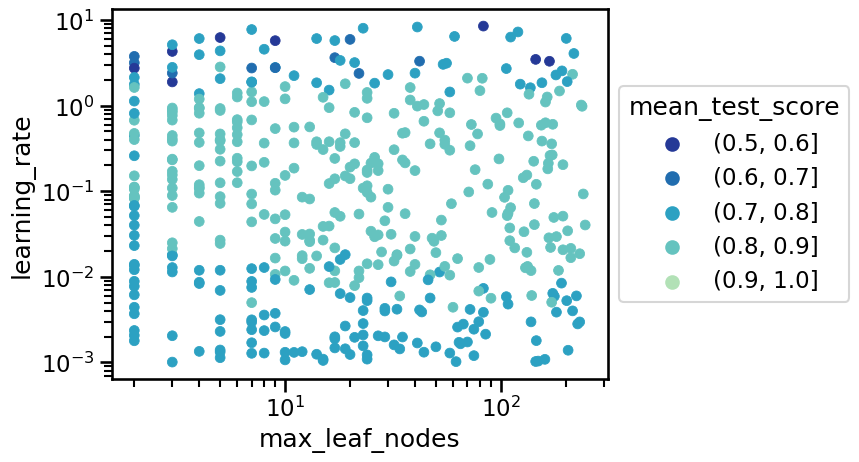

In [3]:
import seaborn as sns
import numpy as np

df = pd.DataFrame(
    {
        "max_leaf_nodes": cv_results["max_leaf_nodes"],
        "learning_rate": cv_results["learning_rate"],
        "score_bin": pd.cut(
            cv_results["mean_test_score"], bins=np.linspace(0.5, 1.0, 6)
        ),
    }
)
sns.set_palette("YlGnBu_r")
ax = sns.scatterplot(
    data=df,
    x="max_leaf_nodes",
    y="learning_rate",
    hue="score_bin",
    s=50,
    color="k",
    edgecolor=None,
)
ax.set_xscale("log")
ax.set_yscale("log")

_ = ax.legend(title="mean_test_score", loc="center left", bbox_to_anchor=(1, 0.5))

In the previous plot we see that the top performing values are located in a
band of learning rate between 0.01 and 1.0, but we have no control in how the
other hyperparameters interact with such values for the learning rate.
Instead, we can visualize all the hyperparameters at the same time using a
parallel coordinates plot.

In [4]:
import numpy as np
import plotly.express as px

fig = px.parallel_coordinates(
    cv_results.rename(shorten_param, axis=1).apply(
        {
            "learning_rate": np.log10,
            "max_leaf_nodes": np.log2,
            "max_bins": np.log2,
            "min_samples_leaf": np.log10,
            "l2_regularization": np.log10,
            "mean_test_score": lambda x: x,
        }
    ),
    color="mean_test_score",
    color_continuous_scale=px.colors.sequential.Viridis,
)
fig.show()

c:\Users\Felipe\anaconda3\envs\scikit-learn-course\Lib\site-packages\plotly\express\_core.py:279: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  dims = [


<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">We <strong>transformed most axis values by taking a log10 or log2</strong> to
spread the active ranges and improve the readability of the plot.</p>
</div>

The parallel coordinates plot will display the values of the hyperparameters
on different columns while the performance metric is color coded. Thus, we are
able to quickly inspect if there is a range of hyperparameters which is
working or not.

It is possible to **select a range of results by clicking and holding on any
axis** of the parallel coordinate plot. You can then slide (move) the range
selection and cross two selections to see the intersections. You can undo a
selection by clicking once again on the same axis.

In particular for this hyperparameter search, it is interesting to confirm
that the yellow lines (top performing models) all reach intermediate values
for the learning rate, that is, tick values between -2 and 0 which correspond
to learning rate values of 0.01 to 1.0 once we invert back the log10 transform
for that axis.

But now we can also observe that it is not possible to select the highest
performing models by selecting lines of on the `max_bins` axis with tick
values between 1 and 3.

The other hyperparameters are not very sensitive. We can check that if we
select the `learning_rate` axis tick values between -1.5 and -0.5 and
`max_bins` tick values between 5 and 8, we always select top performing
models, whatever the values of the other hyperparameters.


In this notebook, we saw how to interactively explore the results of a
large randomized search with multiple interacting hyperparameters.
In particular we observed that some hyperparameters have very little
impact on the cross-validation score, while others have to be adjusted
within a specific range to get models with good predictive accuracy.